# Projekt za Uvod u podatkovnu znanost

Luka Krželj

## Analiza popisa stanovništva



Uzimamo dataset s [Državnog zavoda za statistiku](https://podaci.dzs.hr/hr/statistika-u-nizu/). 
Iz njega ćemo izvući podatke kao što su imena gradova i općina, broj stanovnika, obrazovanje.
csv datoteku koju smo preuzeli sa stranice čitat ćemo pomoću Pandas biblioteke.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('gradovi-u-statistici-prvi.csv', sep = ';', thousands = '.')
df2 = pd.read_csv('gradovi-u-statistici-drugi.csv', sep = ';', thousands = '.')

display(df.head(5))
display(df2.head(5))

,Županije,County of,"Towns/municipalities""",Total: 2011,Men,Women,0-14,15+,Children 0-14,Employed,...,Children 0-14.1,Basic school and less,Secondary education,Higher education,Unknown.1,Total:2021,Men:2021,Women:2021,0-14:2021,15+:2021
0,Zagrebačka,Zagreb,Bedenica,1432,700,732,248,1184,248,511,...,248,575,559,50,-,1266,604,662,201,1065
1,Zagrebačka,Zagreb,Bistra,6632,3237,3395,1119,5513,1119,2564,...,1119,1781,3226,504,2,6444,3129,3315,904,5540
2,Zagrebačka,Zagreb,Brckovljani,6837,3462,3375,1284,5553,1284,2230,...,1284,2402,2835,309,7,5876,2985,2891,922,4954
3,Zagrebačka,Zagreb,Brdovec,11134,5417,5717,1775,9359,1775,4471,...,1775,2515,5818,1025,1,10737,5241,5496,1592,9145
4,Zagrebačka,Zagreb,Dubrava,5245,2576,2669,766,4479,766,1650,...,766,2249,1963,253,14,4520,2220,2300,548,3972


,Županije,County of,Towns/municipalities,"Number of population, 2011 Census","Number of population, 2021 Census",Live births2011.,Live births2012.,Live births2013.,Live births2014.,Live births2015.,...,Deaths2014.,Deaths2015.,Deaths2016.,Deaths2017.,Deaths2018.,Deaths2019.,Deaths2020.,Deaths2021.,Deaths2022.,Deaths2023.
0,Zagrebačka,Zagreb,Bedenica,1432.0,1266.0,18,18,12,13,10,...,18.0,18.0,18.0,18.0,14.0,17.0,15.0,23.0,17.0,18.0
1,Zagrebačka,Zagreb,Bistra,6632.0,6444.0,58,64,45,54,42,...,78.0,82.0,89.0,85.0,69.0,74.0,80.0,86.0,84.0,84.0
2,Zagrebačka,Zagreb,Brckovljani,6837.0,5876.0,88,77,64,71,56,...,65.0,73.0,69.0,67.0,60.0,73.0,65.0,83.0,71.0,64.0
3,Zagrebačka,Zagreb,Brdovec,11134.0,10737.0,117,114,113,112,94,...,110.0,122.0,122.0,118.0,130.0,125.0,114.0,157.0,152.0,116.0
4,Zagrebačka,Zagreb,Dubrava,5245.0,4520.0,54,35,42,34,27,...,92.0,105.0,90.0,79.0,80.0,79.0,61.0,95.0,83.0,60.0


Usporedba promjene broja stanovništva po županijama:
    a) apsolutna promjena
    b) promjena u postotcima

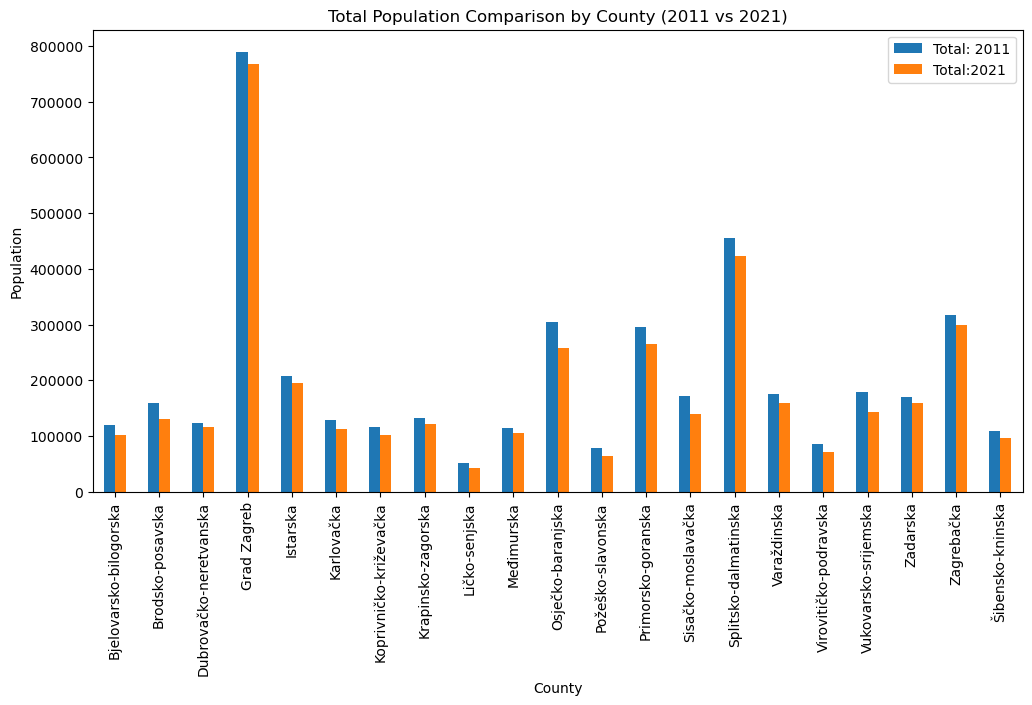

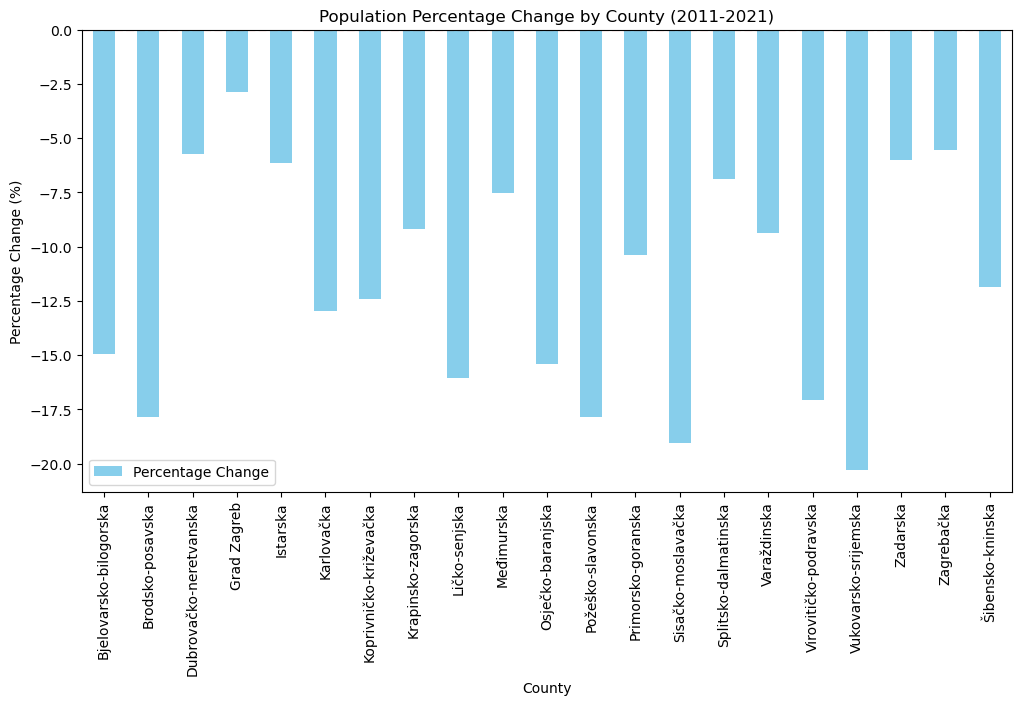

In [2]:
def compare_population(df):
    df_grouped = df.groupby('Županije')[['Total: 2011', 'Total:2021']].sum().reset_index()
    df_grouped.plot(x='Županije', y=['Total: 2011', 'Total:2021'], kind='bar', figsize=(12, 6))
    plt.title('Total Population Comparison by County (2011 vs 2021)')
    plt.xlabel('County')
    plt.ylabel('Population')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

def plot_population_percentage_change(df):
    df_grouped = df.groupby('Županije')[['Total: 2011', 'Total:2021']].sum().reset_index()
    df_grouped['Percentage Change'] = ((df_grouped['Total:2021'] - df_grouped['Total: 2011']) / df_grouped['Total: 2011']) * 100
    df_grouped.plot(x='Županije', y='Percentage Change', kind='bar', figsize=(12, 6), color='skyblue')
    plt.title('Population Percentage Change by County (2011-2021)')
    plt.xlabel('County')
    plt.ylabel('Percentage Change (%)')
    plt.xticks(rotation=90)
    plt.axhline(0, color='red', linestyle='--')
    plt.show()
    
compare_population(df)
plot_population_percentage_change(df)


Usporedba muške i ženske populacije:

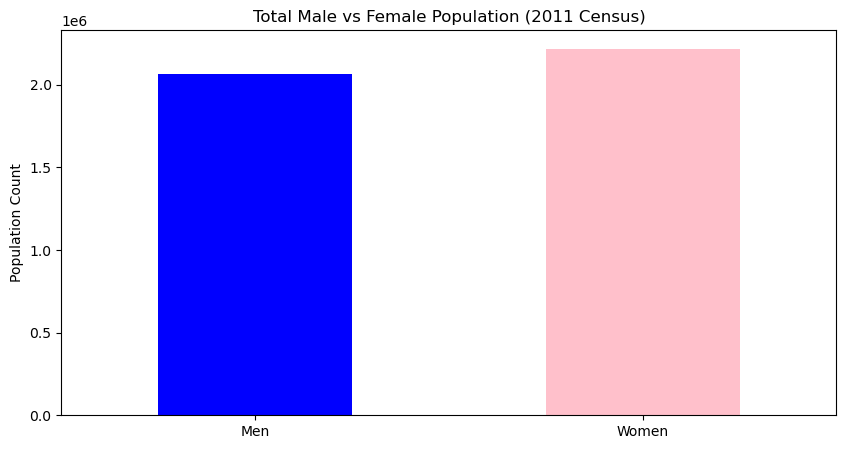

In [3]:
plt.figure(figsize=(10, 5))
df[['Men', 'Women']].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title("Total Male vs Female Population (2011 Census)")
plt.ylabel("Population Count")
plt.xticks(rotation=0)
plt.show()

Trend (u našem slučaju) pada broja stanovnika:

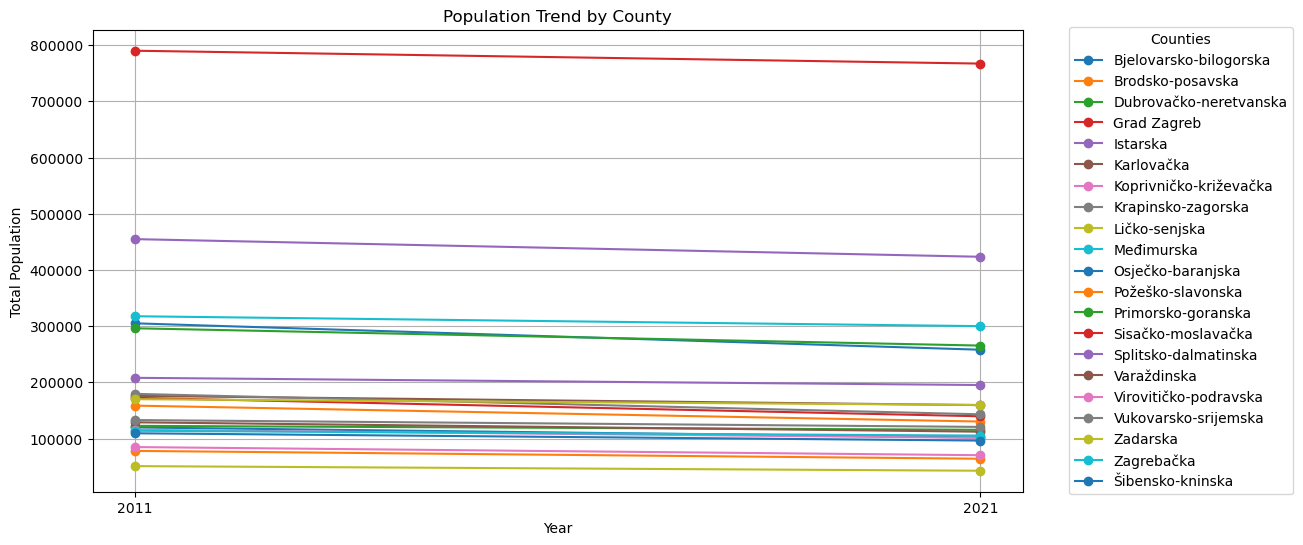

In [4]:
def plot_population_trend_all(df):
    df_grouped = df.groupby('Županije')[['Total: 2011', 'Total:2021']].sum().reset_index()
    plt.figure(figsize=(12, 6))
    for _, row in df_grouped.iterrows():
        plt.plot(['2011', '2021'], [row['Total: 2011'], row['Total:2021']], marker='o', linestyle='-', label=row['Županije'])
    plt.title('Population Trend by County')
    plt.xlabel('Year')
    plt.ylabel('Total Population')
    plt.legend()
    plt.grid(True)
    plt.legend(title='Counties', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
    plt.show()
    
plot_population_trend_all(df)

Prikaz pada broja stanovnika u apsolutnim brojkama u padajućem redoslijedu:

/tmp/ipykernel_2012/2321933949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Županije', y='Absolute Change', palette='coolwarm')


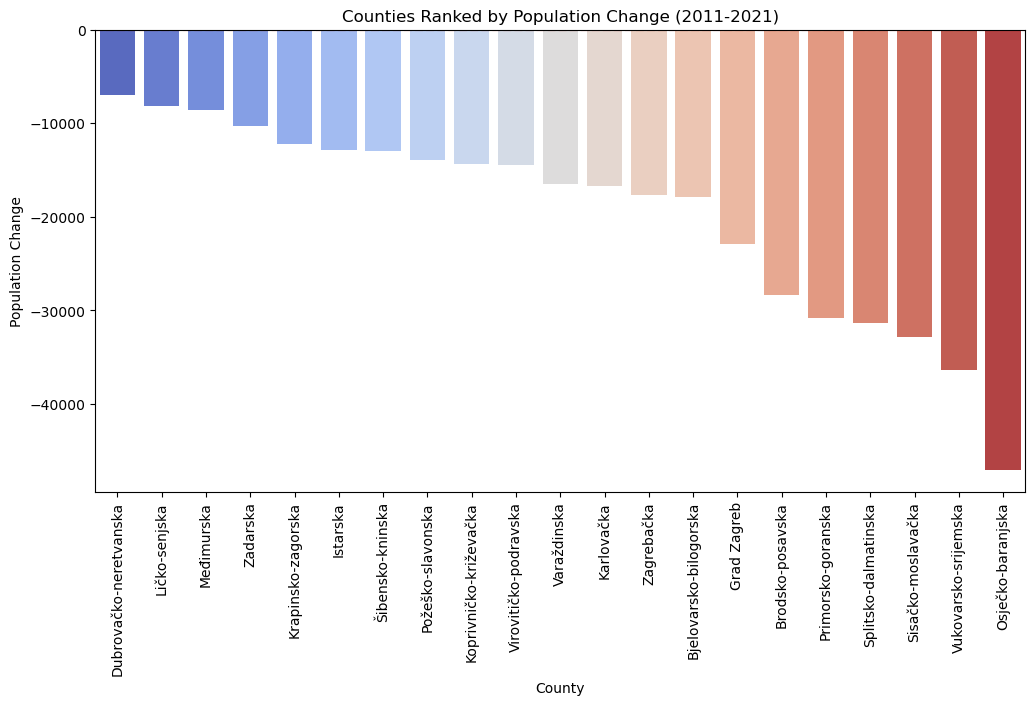

In [5]:
def rank_counties_by_population_change(df):
    df_grouped = df.groupby('Županije')[['Total: 2011', 'Total:2021']].sum().reset_index()
    df_grouped['Absolute Change'] = df_grouped['Total:2021'] - df_grouped['Total: 2011']
    df_sorted = df_grouped.sort_values(by='Absolute Change', ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_sorted, x='Županije', y='Absolute Change', palette='coolwarm')
    plt.title('Counties Ranked by Population Change (2011-2021)')
    plt.xlabel('County')
    plt.ylabel('Population Change')
    plt.xticks(rotation=90)
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

rank_counties_by_population_change(df)

Usporedba umrlih i živorođenih od 2011. do 2023.:

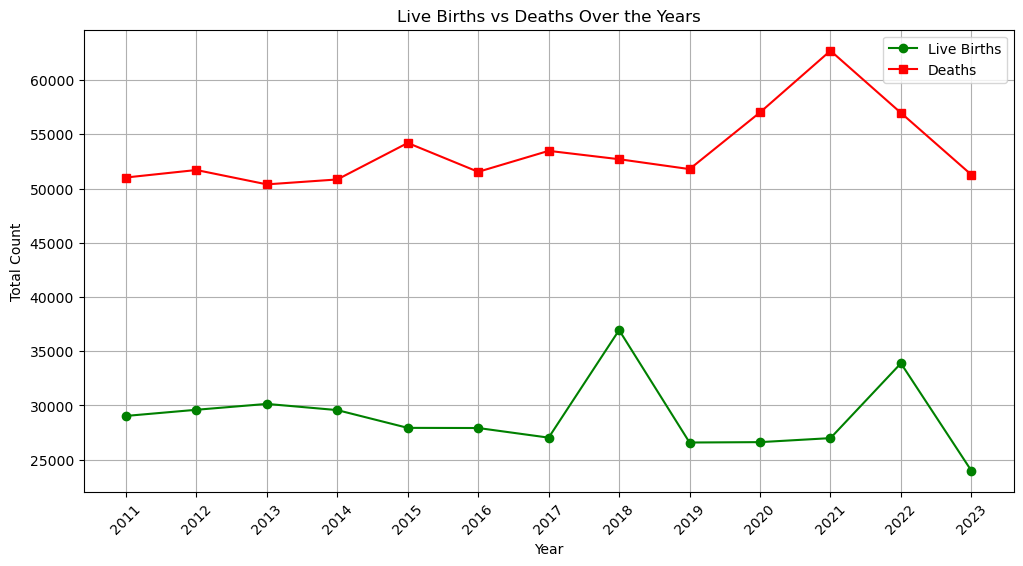

In [6]:
for col in df2.columns:
    if "Live births" in col or "Deaths" in col:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

years = [str(year) for year in range(2011, 2024)]
births = df2[[f'Live births{year}.' for year in years if f'Live births{year}.' in df2.columns]].sum()
deaths = df2[[f'Deaths{year}.' for year in years if f'Deaths{year}.' in df2.columns]].sum()

plt.figure(figsize=(12, 6))
plt.plot(years, births, marker='o', linestyle='-', label='Live Births', color='green')
plt.plot(years, deaths, marker='s', linestyle='-', label='Deaths', color='red')
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Live Births vs Deaths Over the Years")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

Usporedba županija po zaposlenosti i omjer zaposlenih, nezaposlenih i neaktivnih na razini države:

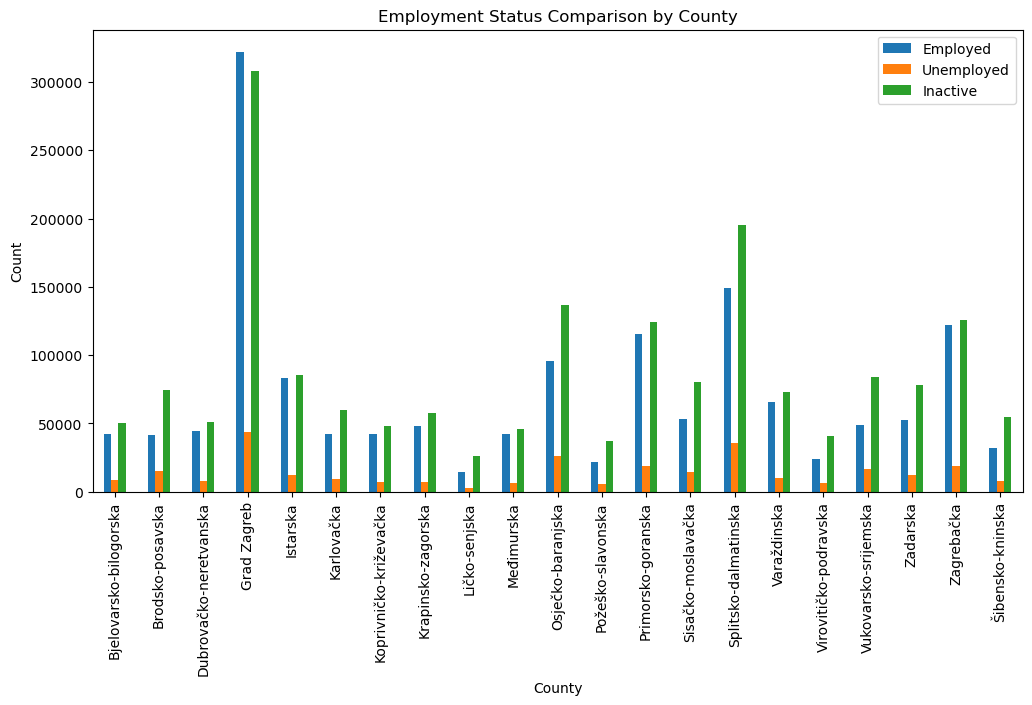

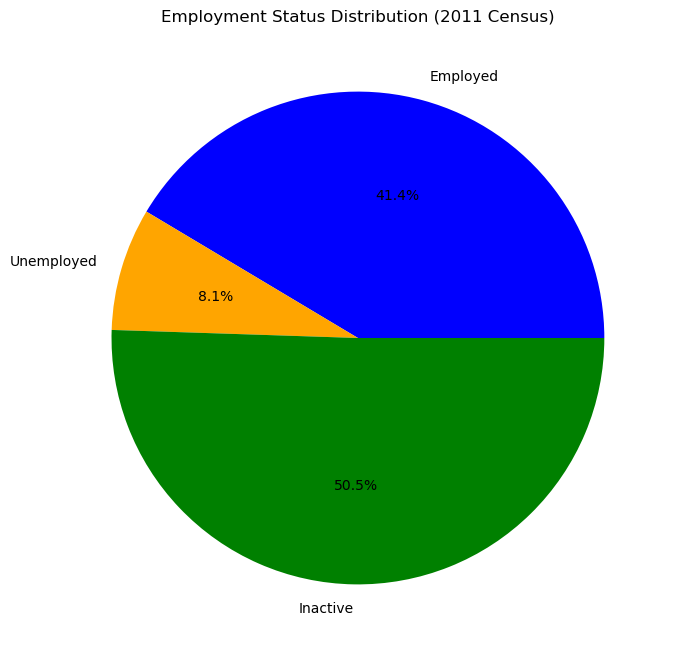

In [7]:
def compare_employment(df):
    df_grouped = df.groupby('Županije')[['Employed', 'Unemployed', 'Inactive']].sum().reset_index()
    df_grouped.plot(x='Županije', y=['Employed', 'Unemployed', 'Inactive'], kind='bar', figsize=(12, 6))
    plt.title('Employment Status Comparison by County')
    plt.xlabel('County')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

compare_employment(df)

employment_status = df[['Employed', 'Unemployed', 'Inactive']].sum()
plt.figure(figsize=(8, 8))
plt.pie(employment_status, labels=employment_status.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title("Employment Status Distribution (2011 Census)")
plt.show()


Obrazovanje po županijama u apsolutnim brojkama:

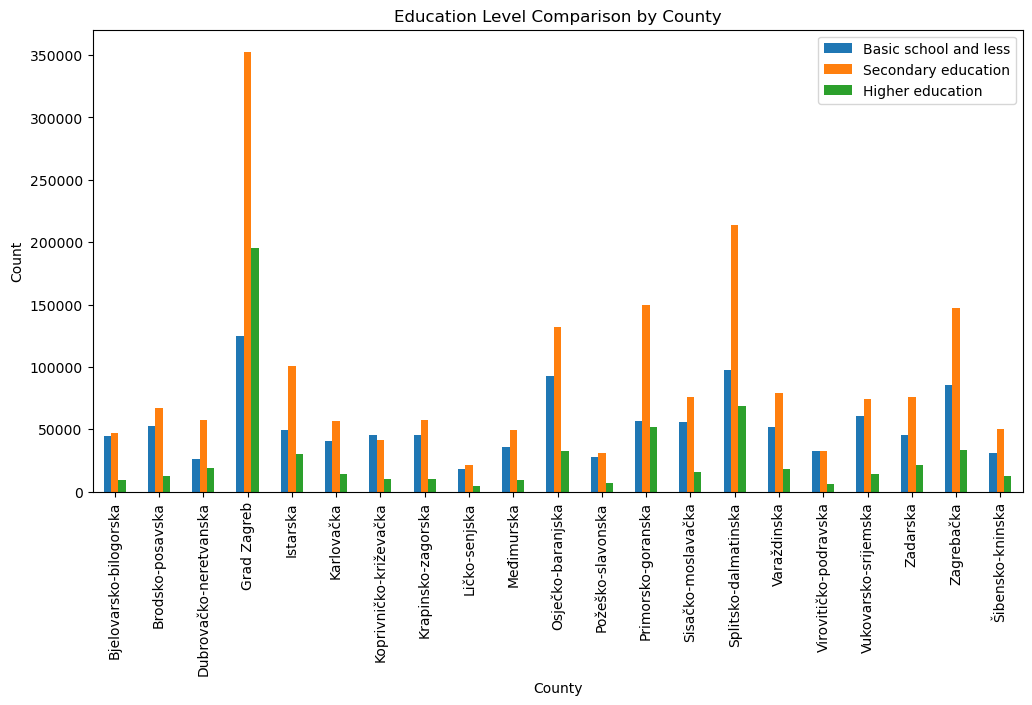

In [8]:
def compare_education(df):
    df_grouped = df.groupby('Županije')[['Basic school and less', 'Secondary education', 'Higher education']].sum().reset_index()
    df_grouped.plot(x='Županije', y=['Basic school and less', 'Secondary education', 'Higher education'], kind='bar', figsize=(12, 6))
    plt.title('Education Level Comparison by County')
    plt.xlabel('County')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

compare_education(df)

Obrazovanje po županijama u postotcima:

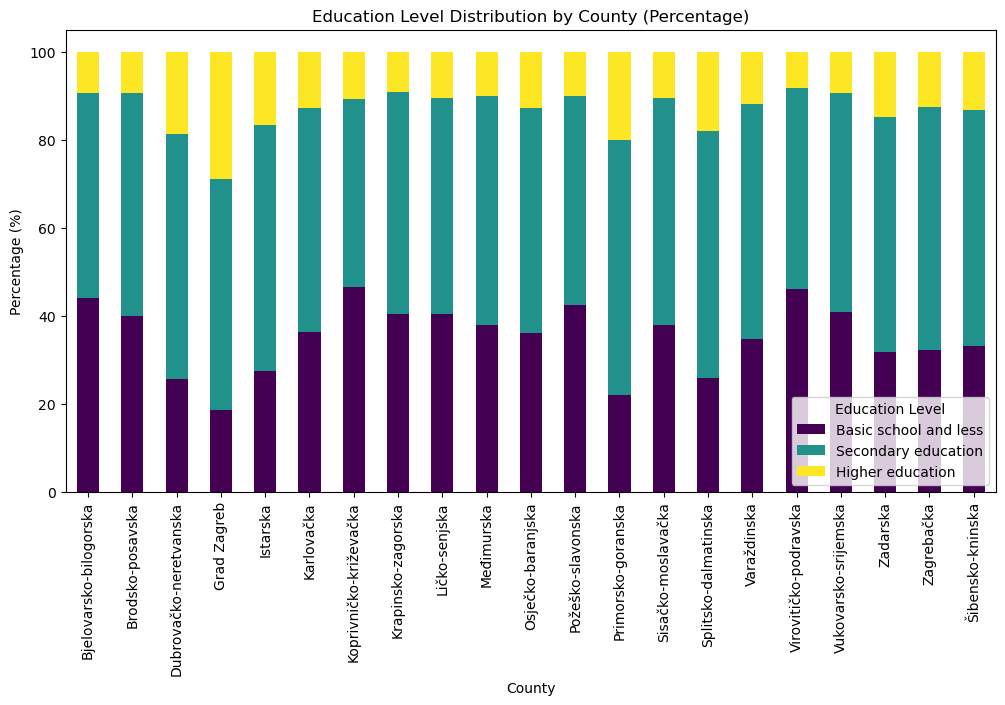

In [9]:
def analyze_education_distribution_percentage(df):
    df_grouped = df.groupby('Županije')[['Basic school and less', 'Secondary education', 'Higher education']].sum()
    df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
    df_grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title('Education Level Distribution by County (Percentage)')
    plt.xlabel('County')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=90)
    plt.legend(title='Education Level')
    plt.show()

analyze_education_distribution_percentage(df)

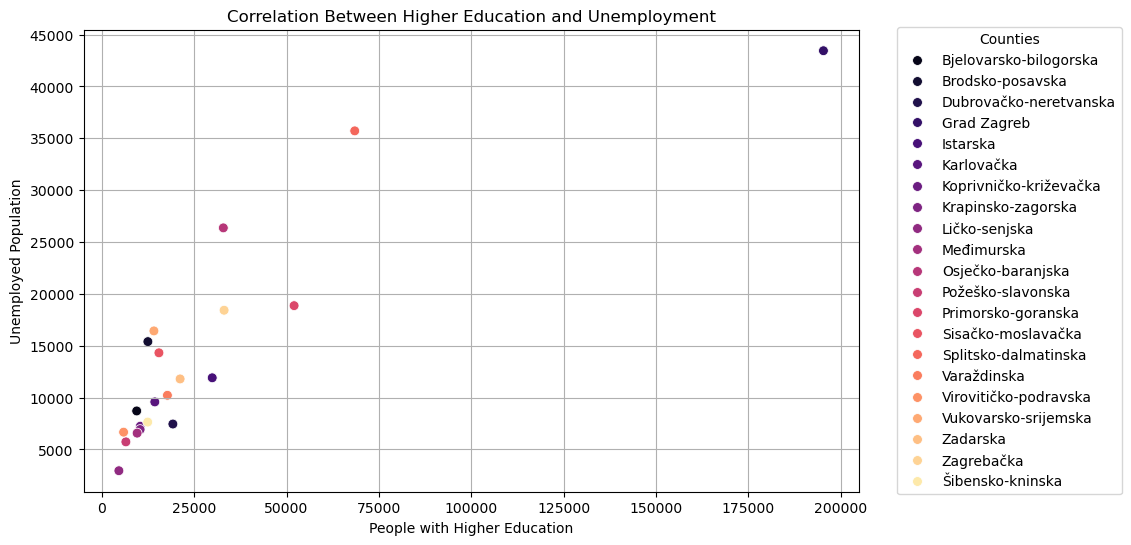

In [10]:
def analyze_education_vs_employment(df):
    df_grouped = df.groupby('Županije')[['Higher education', 'Unemployed']].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_grouped, x='Higher education', y='Unemployed', hue='Županije', palette='magma', s=50)
    plt.title('Correlation Between Higher Education and Unemployment')
    plt.xlabel('People with Higher Education')
    plt.ylabel('Unemployed Population')
    plt.grid(True)
    plt.legend(title='Counties', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
    plt.show()

analyze_education_vs_employment(df)